<a href="https://colab.research.google.com/github/NadAAaHH/Employee-attrition-prediction/blob/main/Human_Resources_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


_Questions to answer:_
- What's the average age of leaving?
- Does the education level impcat the probability of leaving?
- Does living far from work increase the probability of leaving?
- Does uncomfortable work environment increases the probability of leaving?
- Is there a gender having a higher probability of leaving?
- Does having a high monthly income decreases the probability of leaving?
- Does being a fresh graduate/Junior increases the probability of leaving?
- Is there a relationship between working overtime and leaving rate?
- Does having bad relationships increases the probability of leaving?
- Does having an unbalance between work and life increases the probability of leaving?
- Does being a tenured employee decreases the probability of leaving?
- Does working too long in the same role increases the probability of leaving?
- Does having a frequent promotion decreases the probability of leaving?
- Is there a relationship between working too long with the same manager and leaving rate?
- Does being single increases the probability of leaving?




## **Importing Python Libraries**

In [ ]:
# Set a flag to install the library only once
if not 'cell_executed' in locals():
    !pip install ydata-profiling

    # Set the flag
    cell_executed = True

In [ ]:
# importing libraries for data handling and analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport

In [ ]:
# importing libraries for data visualisations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# importing libraries for data preprocessing and model training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.svm import SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# Undersampling: RandomUnderSampler (Randomly remove instances)
from imblearn.under_sampling import RandomUnderSampler, NearMiss

## **Importing the Data**

In [ ]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('/content/Human_Resources.csv')

In [ ]:
df.shape

(1470, 35)

> The dataset contains **1,470 rows** and **35 columns**.

## **Data Exploration & Processing**

> This section will use Pandas exploration functions to explore and analyze the dataset in more detail.

### Data Inspection

In [ ]:
# Dataset Report
ProfileReport(df,
              title='Human Resources Dataset Report',
              minimal=True,
              progress_bar=False,
              samples=None,
              correlations=None,
              interactions=None,
              explorative=True,
              dark_mode=True,
              notebook={'iframe':{'height': '600px'}},
              html={'style':{'primary_color': '#FFCC00'}},
              missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [ ]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> The dataset contains numerical and object features.  
Additionally, it appears that there is no missing values in the dataset.

In [ ]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Drop Irrelevant Features

> Since `EmployeeNumber` is unique for every employee, and  `EmployeeCount`, `StandardHours` and `Over18` are constant for all employees, they do not provide any useful information. Therefore, they will be dropped from the dataset to improve the performance of the model.

In [ ]:
filtered_df = (df.nunique() == 1) | (df.nunique() == len(df))
# List Comprehension
lst1  = [index for index, value in filtered_df.items() if value]
print('Irrelevant Columns: ' , lst1)

Irrelevant Columns:  ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']


In [ ]:
for i in lst1:
  df.drop(i , axis = 1, inplace = True)

In [ ]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

### Feature Engineering

> Feature engineering is essential to enhance the performance of the classifiers. Given that the dataset have features representing hourly rate, daily rate, and monthly rate. New features will be created by calculating ratios between these rates using the following formulas:
* **Hourly-to-Daily Rate Ratio:** Hourly Rate / Hours per Day
* **Daily-to-Monthly Rate Ratio:** Daily Rate / Days per Month
* **Hourly-to-Monthly Rate Ratio:** Hourly Rate / ( Hours per Day * Days per Month )

In [ ]:
for index, row in df.iterrows():
  h_per_d = row['DailyRate'] / row['HourlyRate']
  d_per_m = row['MonthlyRate'] / row['DailyRate']

  df.loc[index, 'H2D_Ratio'] = round(row['HourlyRate'] / h_per_d , 2)
  df.loc[index, 'D2M_Ratio'] = round(row['DailyRate'] / d_per_m , 2)
  df.loc[index, 'H2M_Ratio'] = round(row['HourlyRate'] / (h_per_d * d_per_m) , 2)

In [ ]:
df.head().iloc[:, -3:]

H2D_Ratio  D2M_Ratio  H2M_Ratio
0       8.02      62.34       0.45
1      13.34       3.13       0.15
2       6.16     786.78       3.53
3       2.25      83.67       0.14
4       2.71      21.00       0.10

In [ ]:
len(df.columns)

34

In [ ]:
df['OverallSatisfaction'] = df['EnvironmentSatisfaction'] + df['RelationshipSatisfaction'] + df['JobSatisfaction'] + df['WorkLifeBalance']

In [ ]:
len(df.columns)

35

### Age Binning

In [ ]:
# Define the bins and labels for age groups
bins =    [0, 25, 35, 45, 100]  # specify the bin edges
labels =  [1, 2, 3, 4]  # '19-25', '26-35', '36-45', '45+'

In [ ]:
# Create a new column 'AgeGroup' with the bin labels
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Convert the 'AgeGroup' column to int
df['AgeGroup'] = df['AgeGroup'].astype(int)

In [ ]:
df.head(20)[['Age', 'AgeGroup']]

Age  AgeGroup
0    41         3
1    49         4
2    37         3
3    33         2
4    27         2
5    32         2
6    59         4
7    30         2
8    38         3
9    36         3
10   35         3
11   29         2
12   31         2
13   34         2
14   28         2
15   29         2
16   32         2
17   22         1
18   53         4
19   38         3

In [ ]:
len(df.columns)

36

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

### Feature Scaling

In [ ]:
# Columns to be scaled
columns_to_scale = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'Age', 'DistanceFromHome']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Scale the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df.head()[columns_to_scale]

DailyRate  HourlyRate  MonthlyIncome  MonthlyRate       Age  \
0   0.715820    0.914286       0.262454     0.698053  0.547619   
1   0.126700    0.442857       0.217009     0.916001  0.738095   
2   0.909807    0.885714       0.056925     0.012126  0.452381   
3   0.923407    0.371429       0.100053     0.845814  0.357143   
4   0.350036    0.142857       0.129489     0.583738  0.214286   

   DistanceFromHome  
0          0.000000  
1          0.250000  
2          0.035714  
3          0.071429  
4          0.035714

### Feature Encoding

> For a better data visualizations, it's necessary to encode the categorical features.  
The **Binary features** will be replaced with 0 and 1.  

In [ ]:
# select only the categorical features
categorical_features = list(df.select_dtypes(include ='object').columns)
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
# select only binary categorical features
filtered_df = df[categorical_features].nunique() == 2

# List Comprehension
lst1  = [index for index, value in filtered_df.items() if value]
print('Binary Columns: ' , lst1)

Binary Columns:  ['Attrition', 'Gender', 'OverTime']


In [ ]:
df_encoded = df.copy()

In [ ]:
# replace binary columns with 0 and 1
for feature in lst1:
  lst_unique_vals = df_encoded[feature].unique().tolist()
  mapping = {lst_unique_vals[0]: 0, lst_unique_vals[1]: 1}
  df_encoded[feature] = df_encoded[feature].map(mapping)

In [ ]:
df_encoded[lst1]

Attrition  Gender  OverTime
0             0       0         0
1             1       1         1
2             0       1         0
3             1       0         0
4             1       1         1
...         ...     ...       ...
1465          1       1         1
1466          1       1         1
1467          1       1         0
1468          1       1         1
1469          1       1         1

[1470 rows x 3 columns]

In [ ]:
df_encoded

Age  Attrition     BusinessTravel  DailyRate  \
0     0.547619          0      Travel_Rarely   0.715820   
1     0.738095          1  Travel_Frequently   0.126700   
2     0.452381          0      Travel_Rarely   0.909807   
3     0.357143          1  Travel_Frequently   0.923407   
4     0.214286          1      Travel_Rarely   0.350036   
...        ...        ...                ...        ...   
1465  0.428571          1  Travel_Frequently   0.559771   
1466  0.500000          1      Travel_Rarely   0.365784   
1467  0.214286          1      Travel_Rarely   0.037938   
1468  0.738095          1  Travel_Frequently   0.659270   
1469  0.380952          1      Travel_Rarely   0.376521   

                  Department  DistanceFromHome  Education EducationField  \
0                      Sales          0.000000          2  Life Sciences   
1     Research & Development          0.250000          1  Life Sciences   
2     Research & Development          0.035714          2          Other   
3     Research & Development          0.071429          4  Life Sciences   
4     Research & Development          0.035714          1        Medical   
...                      ...               ...        ...            ...   
1465  Research & Development          0.785714          2        Medical   
1466  Research & Development          0.178571          1        Medical   
1467  Research & Development          0.107143          3  Life Sciences   
1468                   Sales          0.035714          3        Medical   
1469  Research & Development          0.250000          3        Medical   

      EnvironmentSatisfaction  Gender  ...  WorkLifeBalance  YearsAtCompany  \
0                           2       0  ...                1               6   
1                           3       1  ...                3              10   
2                           4       1  ...                3               0   
3                           4       0  ...                3               8   
4                           1       1  ...                3               2   
...                       ...     ...  ...              ...             ...   
1465                        3       1  ...                3               5   
1466                        4       1  ...                3               7   
1467                        2       1  ...                3               6   
1468                        4       1  ...                2               9   
1469                        2       1  ...                4               4   

      YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
0                      4                       0                     5   
1                      7                       1                     7   
2                      0                       0                     0   
3                      7                       3                     0   
4                      2                       2                     2   
...                  ...                     ...                   ...   
1465                   2                       0                     3   
1466                   7                       1                     7   
1467                   2                       0                     3   
1468                   6                       0                     8   
1469                   3                       1                     2   

     H2D_Ratio  D2M_Ratio  H2M_Ratio  OverallSatisfaction  AgeGroup  
0         8.02      62.34       0.45                    8         3  
1        13.34       3.13       0.15                   12         4  
2         6.16     786.78       3.53                   12         3  
3         2.25      83.67       0.14                   13         2  
4         2.71      21.00       0.10                   10         2  
...        ...        ...        ...                  ...       ...  
1465      1.90      63.58       0.14                   13    

In [ ]:
# select the non-binary categorical features
lst2 = [item for item in categorical_features if item not in lst1]
lst2

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [ ]:
df_encoded[lst2]

BusinessTravel              Department EducationField  \
0         Travel_Rarely                   Sales  Life Sciences   
1     Travel_Frequently  Research & Development  Life Sciences   
2         Travel_Rarely  Research & Development          Other   
3     Travel_Frequently  Research & Development  Life Sciences   
4         Travel_Rarely  Research & Development        Medical   
...                 ...                     ...            ...   
1465  Travel_Frequently  Research & Development        Medical   
1466      Travel_Rarely  Research & Development        Medical   
1467      Travel_Rarely  Research & Development  Life Sciences   
1468  Travel_Frequently                   Sales        Medical   
1469      Travel_Rarely  Research & Development        Medical   

                        JobRole MaritalStatus  
0               Sales Executive        Single  
1            Research Scientist       Married  
2         Laboratory Technician        Single  
3            Research Scientist       Married  
4         Laboratory Technician       Married  
...                         ...           ...  
1465      Laboratory Technician       Married  
1466  Healthcare Representative       Married  
1467     Manufacturing Director       Married  
1468            Sales Executive       Married  
1469      Laboratory Technician       Married  

[1470 rows x 5 columns]

> Since the remaining categorical features are **Nominal** (unordered data), they will be encoded using **One-hot encoding** technique with `pd.get_dummies()` function


In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns= lst2)
df_encoded

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0     0.547619          0   0.715820          0.000000          2   
1     0.738095          1   0.126700          0.250000          1   
2     0.452381          0   0.909807          0.035714          2   
3     0.357143          1   0.923407          0.071429          4   
4     0.214286          1   0.350036          0.035714          1   
...        ...        ...        ...               ...        ...   
1465  0.428571          1   0.559771          0.785714          2   
1466  0.500000          1   0.365784          0.178571          1   
1467  0.214286          1   0.037938          0.107143          3   
1468  0.738095          1   0.659270          0.035714          3   
1469  0.380952          1   0.376521          0.250000          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2       0    0.914286               3         2   
1                           3       1    0.442857               2         2   
2                           4       1    0.885714               2         1   
3                           4       0    0.371429               3         1   
4                           1       1    0.142857               3         1   
...                       ...     ...         ...             ...       ...   
1465                        3       1    0.157143               4         2   
1466                        4       1    0.171429               2         3   
1467                        2       1    0.814286               4         2   
1468                        4       1    0.471429               2         2   
1469                        2       1    0.742857               4         2   

      ...  JobRole_Laboratory Technician  JobRole_Manager  \
0     ...                              0                0   
1     ...                              0                0   
2     ...                              1                0   
3     ...                              0                0   
4     ...                              1                0   
...   ...                            ...              ...   
1465  ...                              1                0   
1466  ...                              0                0   
1467  ...                              0                0   
1468  ...                              0                0   
1469  ...                              1                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
1465                               0                          0   
1466                               0                          0   
1467                               1                          0   
1468                               0                          0   
1469                               0                          0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                              0                        1   
1                              1                        0   
2                              0                        0   
3                              1                        0   
4                              0                        0   
...                          ...                      ...   
1465                           0                        0   
1466                           0                        0   
1467                           0                        0   
1468                           0                        1   
1469                    

> Note that the new encoded dataframe is saved separately to ensure that the visualizations are not affected.

## **Exploratory Data Analysis (EDA)**

### Statistical Overview

In [ ]:
df.describe().T

count       mean         std    min        25%  \
Age                       1470.0   0.450567    0.217509   0.00   0.285714   
DailyRate                 1470.0   0.501421    0.288840   0.00   0.259843   
DistanceFromHome          1470.0   0.292590    0.289531   0.00   0.035714   
Education                 1470.0   2.912925    1.024165   1.00   2.000000   
EnvironmentSatisfaction   1470.0   2.721769    1.093082   1.00   2.000000   
HourlyRate                1470.0   0.512731    0.290420   0.00   0.257143   
JobInvolvement            1470.0   2.729932    0.711561   1.00   2.000000   
JobLevel                  1470.0   2.063946    1.106940   1.00   1.000000   
JobSatisfaction           1470.0   2.728571    1.102846   1.00   2.000000   
MonthlyIncome             1470.0   0.289307    0.247918   0.00   0.100158   
MonthlyRate               1470.0   0.490629    0.285797   0.00   0.239028   
NumCompaniesWorked        1470.0   2.693197    2.498009   0.00   1.000000   
PercentSalaryHike         1470.0  15.209524    3.659938  11.00  12.000000   
PerformanceRating         1470.0   3.153741    0.360824   3.00   3.000000   
RelationshipSatisfaction  1470.0   2.712245    1.081209   1.00   2.000000   
StockOptionLevel          1470.0   0.793878    0.852077   0.00   0.000000   
TotalWorkingYears         1470.0  11.279592    7.780782   0.00   6.000000   
TrainingTimesLastYear     1470.0   2.799320    1.289271   0.00   2.000000   
WorkLifeBalance           1470.0   2.761224    0.706476   1.00   2.000000   
YearsAtCompany            1470.0   7.008163    6.126525   0.00   3.000000   
YearsInCurrentRole        1470.0   4.229252    3.623137   0.00   2.000000   
YearsSinceLastPromotion   1470.0   2.187755    3.222430   0.00   0.000000   
YearsWithCurrManager      1470.0   4.123129    3.568136   0.00   2.000000   
H2D_Ratio                 1470.0   9.023939   10.352046   0.60   3.130000   
D2M_Ratio                 1470.0  86.161109  116.950795   0.41  15.462500   
H2M_Ratio                 1470.0   0.496435    0.540104   0.03   0.170000   
OverallSatisfaction       1470.0  10.923810    2.023259   4.00  10.000000   
AgeGroup                  1470.0   2.704762    0.876230   1.00   2.000000   

                                50%         75%     max  
Age                        0.428571    0.595238    1.00  
DailyRate                  0.501074    0.755190    1.00  
DistanceFromHome           0.214286    0.464286    1.00  
Education                  3.000000    4.000000    5.00  
EnvironmentSatisfaction    3.000000    4.000000    4.00  
HourlyRate                 0.514286    0.767857    1.00  
JobInvolvement             3.000000    3.000000    4.00  
JobLevel                   2.000000    3.000000    5.00  
JobSatisfaction            3.000000    4.000000    4.00  
MonthlyIncome              0.205898    0.388099    1.00  
MonthlyRate                0.487513    0.737503    1.00  
NumCompaniesWorked         2.000000    4.000000    9.00  
PercentSalaryHike         14.000000   18.000000   25.00  
PerformanceRating          3.000000    3.000000    4.00  
RelationshipSatisfaction   3.000000    4.000000    4.00  
StockOptionLevel           1.000000    1.000000    3.00  
TotalWorkingYears         10.000000   15.000000   40.00  
TrainingTimesLastYear      3.000000    3.000000    6.00  
WorkLifeBalance            3.000000    3.000000    4.00  
YearsAtCompany             5.000000    9.000000   40.00  
YearsInCurrentRole         3.000000    7.000000   18.00  
YearsSinceLastPromotion    1.000000    3.000000   15.00  
YearsWithCurrManager       3.000000    7.000000   17.00  
H2D_Ratio                  5.980000   10.112500   83.77  
D2M_Ratio                 49.355000  104.010000  974.28  
H2M_Ratio                  0.330000    0.587500    4.16  
OverallSatisfaction       11.000000   12.000000   16.00  
AgeGroup                   3.000000    3.000000    4.00

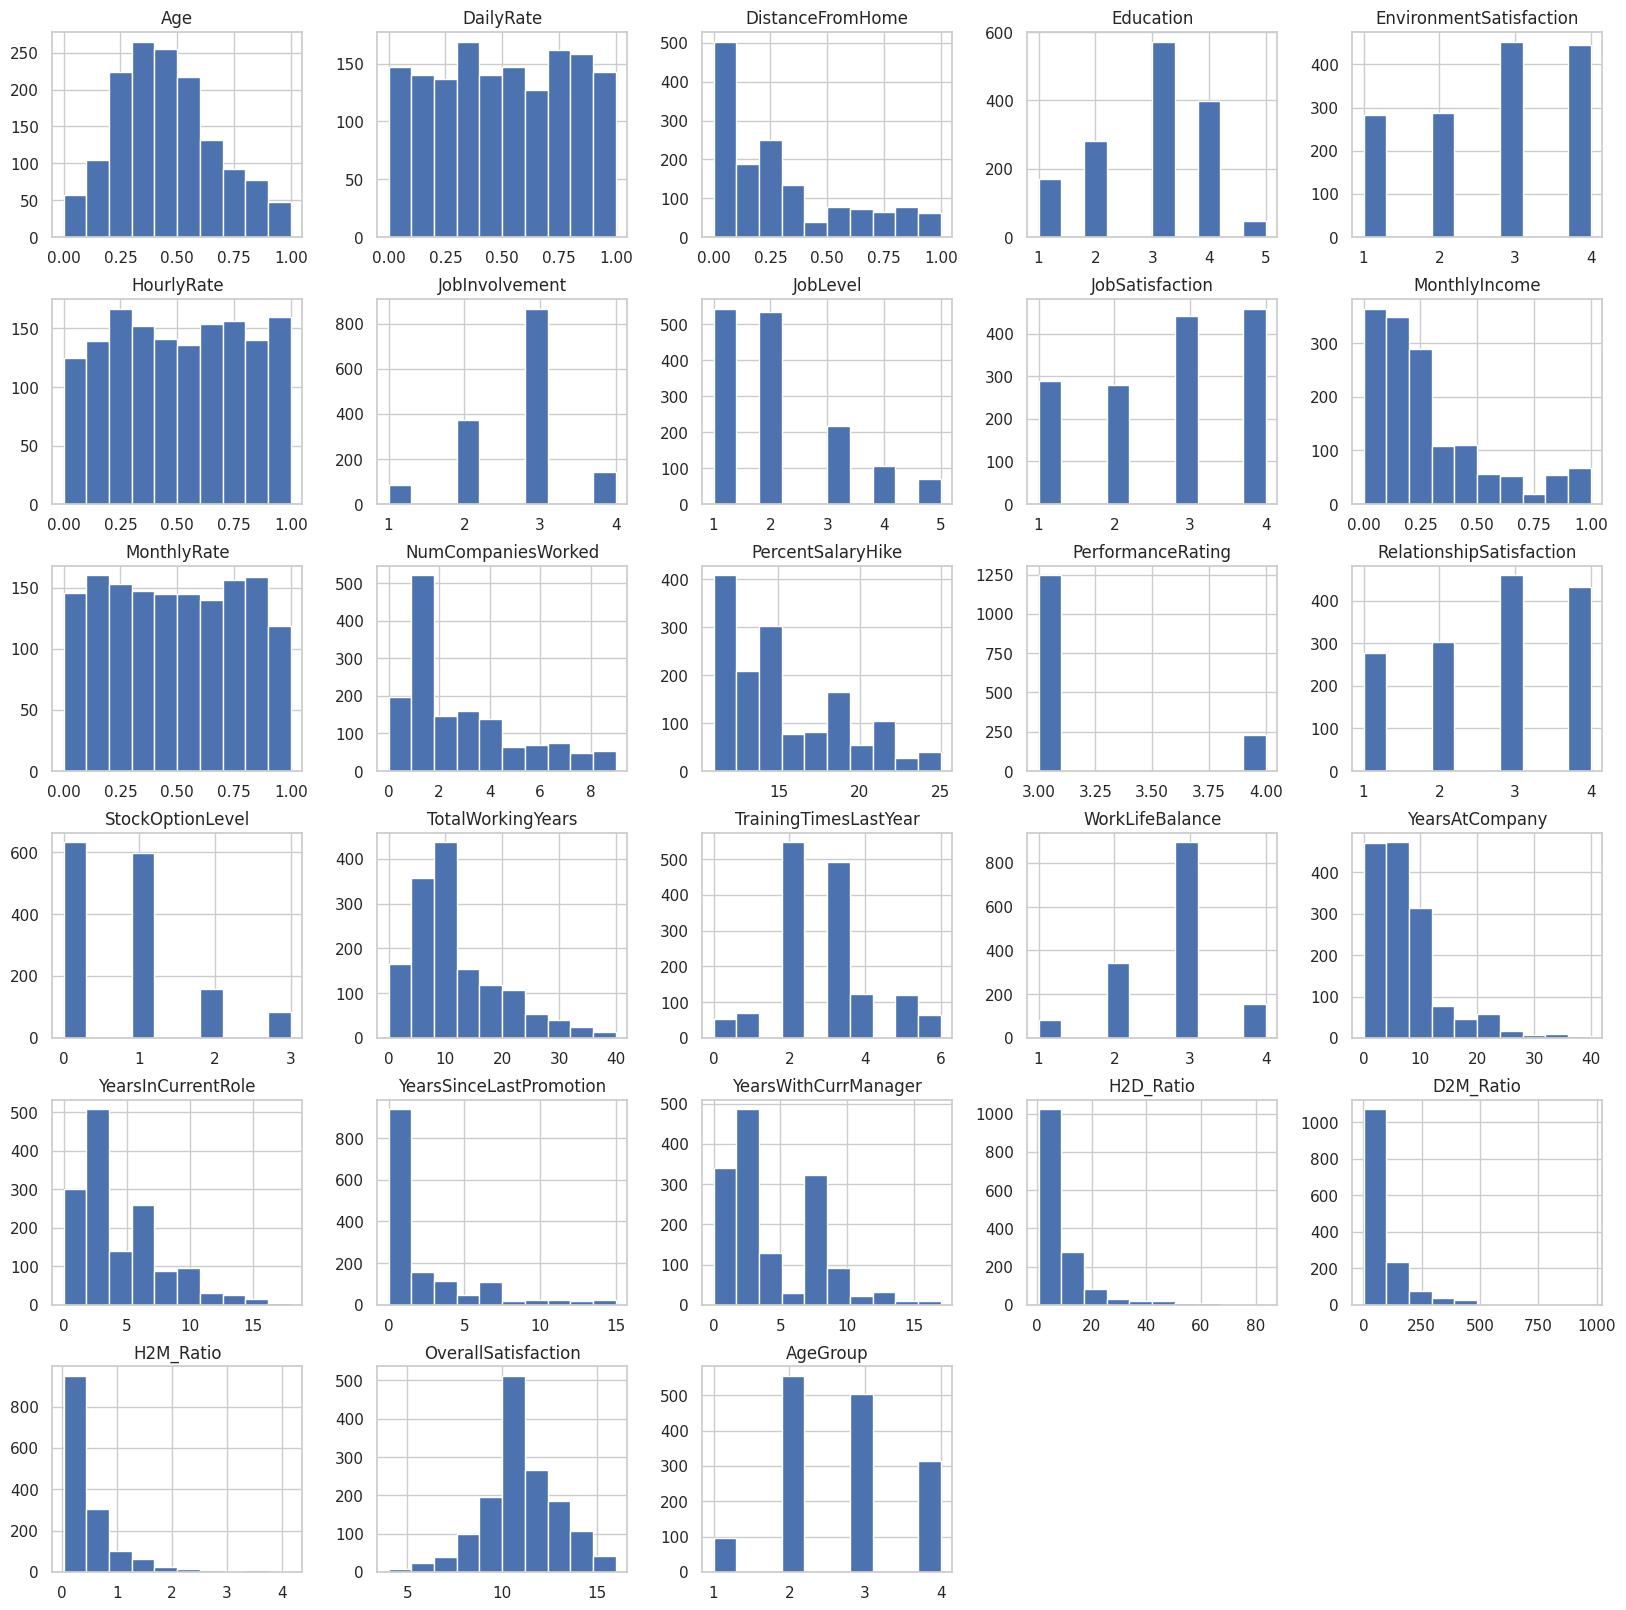

In [ ]:
sns.set(style="whitegrid")
df.hist(figsize=(20,20))
plt.show()

> The above histograms reveal the following information:
1. The average age of employees falls within the range of 30 to 40.
2. The disturbution of the `DistanceFromHome` feature is left skewed, indicating that a significant number of employees reside close to their workplace.
3. The average education level of employees is at the Bachelor's degree level.
4. There is more than half low satisfaction rates in  `EnvironmentSatisfaction`, `JobSatisfaction`, and `RelationshipSatisfaction`.
5. The number of male employees is higher than the number of female employees.
6. A high level of `JobInvolvement` has been reported by the majority of employees.
7. The majority of employees are at an entry-level position.
8. The disturbution of the `MonthlyIncome` feature is left skewed, indicating that the majority of employees earn less than 5000.
9. The mode in `NumCompaniesWorked` feature is 1, indicating that most employees have worked for only one company before.
10. The majority of employees do not work overtime.
11. ---
12. The mode in `PerformanceRating` feature is 3, indicating that most employees are performing well.
13. Most employees are either not investing in the company's stock or at level 1.
14. The disturbution of the `TotalWorkingYears` and `YearsAtCompany` features is left skewed, indicating that the majority of employees have less than 10 years of work experience.
15. The majority of employees received a two-hour training session last year.
16. The mode in `YearsInCurrentRole` feature is 3, which might be a good indicator (career growth, learning and skill development) or bad indicator (job disatisfaction, burnout, lack of recognition, etc.)
17. The mode in `YearsSinceLastPromotion` feature is 0, indicating that most employees receives promotions frequently.
18. The mode in `YearsWithCurrManager` feature is 3 years, which is a reasonable amount of time given the high rate of promotions.

<ipython-input-117-a7d380c506c3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


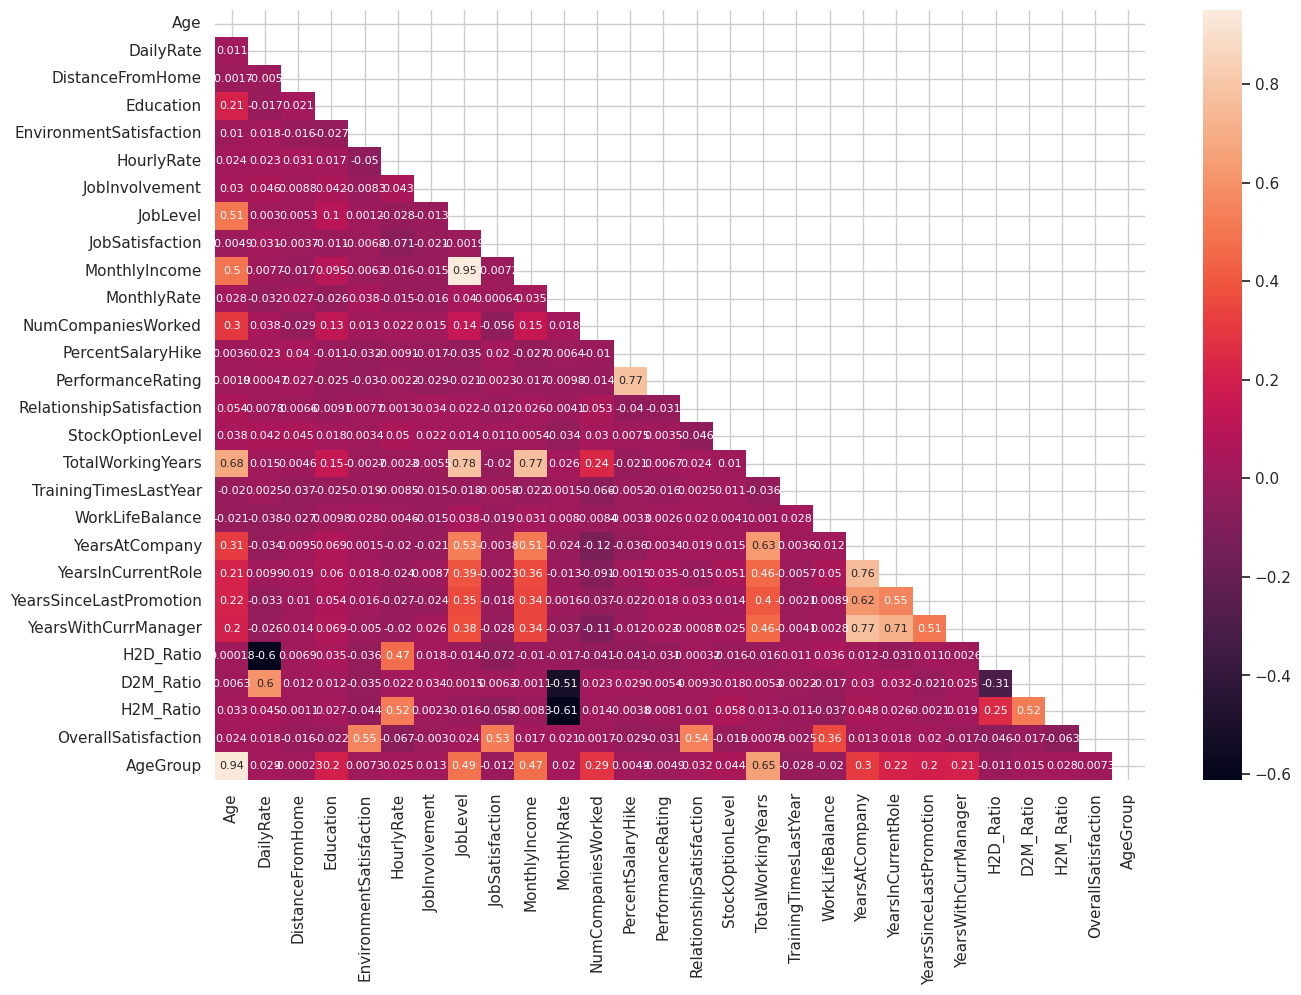

In [ ]:
# Create a correlation heatmap of the features
f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, annot_kws={"fontsize":8}, mask=mask);

> Some observations based on the above heatmap:
* `JobLevel`, `TotalWorkingYears` and `MonthlyIncome` have a correlation with `Age`, which is somewhat obvious.
* `JobLevel` have a correlation with `TotalWorkingYears` and a very high correlation with `MonthlyIncome`, which is obvious.
* `PerformanceRating` have a high correlation with `PercentSalaryHike`, which is a good indicator.
* `TotalWorkingYears` have a high correlation with `YearsAtCompany`, indicating that a number of employees has gained their working years experince in this company.
* `YearsInCurrentRole`,`YearsSinceLastPromotion` and `YearsWithCurrManager` have a correlation with `YearsAtCompany`, indicating that the majority of employees has been working in the same role with the same manager for a number of years. (the company is stagnant?)  

> The following steps will focus on exploring the relationship between features using various types of plots.  

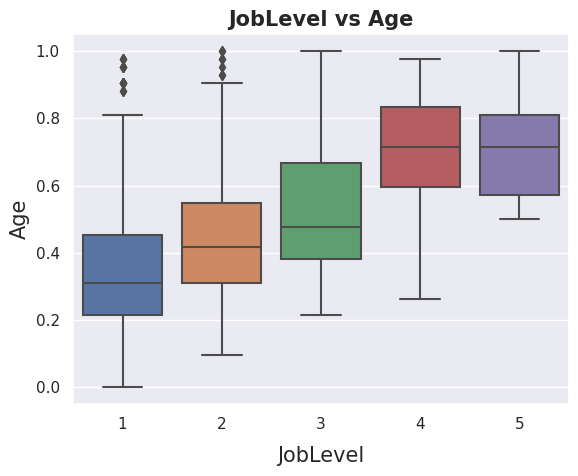

In [ ]:
sns.set(style="darkgrid")
sns.boxplot(data = df, x = 'JobLevel', y= 'Age')

plt.xlabel("JobLevel", fontsize=15, labelpad=10)
plt.ylabel("Age", fontsize=15)
plt.title("JobLevel vs Age", fontweight="bold", fontsize=15)

plt.show()

> The IQRs show a gradual increase in `Joblevel` as `Age` increases. The irregularity in the upper whiskers can be due to the lack of age restrictions for the jobs.



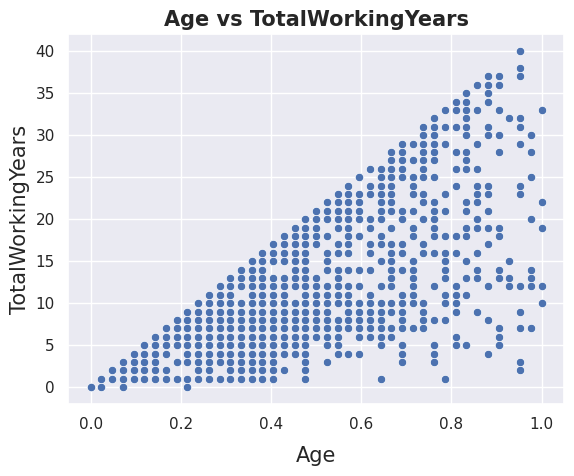

In [ ]:
sns.set(style="darkgrid")
sns.scatterplot(data = df, x = 'Age', y= 'TotalWorkingYears')

plt.xlabel("Age", fontsize=15, labelpad=10)
plt.ylabel("TotalWorkingYears", fontsize=15)
plt.title("Age vs TotalWorkingYears", fontweight="bold", fontsize=15)

plt.show()

> The scatter plot is forming an angeld triangle, where the hypotenuse of the triangle suggests a strong positive trend between `Age` and `TotalWorkingYears` .

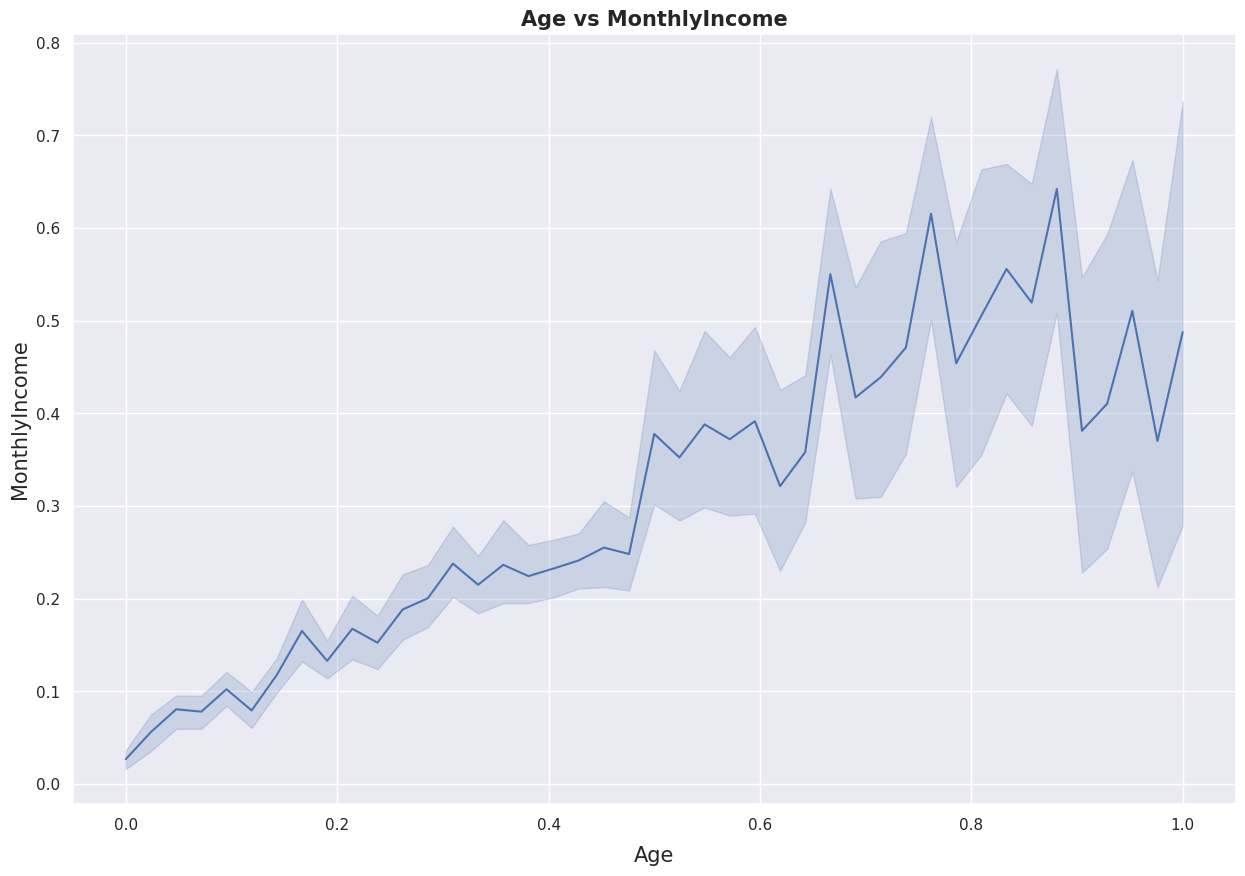

In [ ]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data = df, x = 'Age', y = 'MonthlyIncome')

plt.xlabel("Age", fontsize=15, labelpad=10)
plt.ylabel("MonthlyIncome", fontsize=15)
plt.title("Age vs MonthlyIncome", fontweight="bold", fontsize=15)

plt.show()

> The line slopes upwards, indicating a positive correlation between `Age` and `MonthlyIncome` . This means that on average, employees earn higher income as they get older. Additionally, the growing error band as the line it goes to the right indicates an increased in the uncertainty or variability of the data.

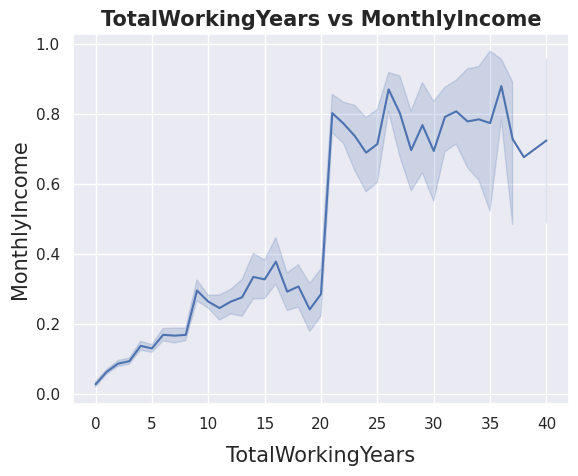

In [ ]:
sns.set(style="darkgrid")
sns.lineplot(data = df, x = 'TotalWorkingYears', y= 'MonthlyIncome')

plt.xlabel("TotalWorkingYears", fontsize=15, labelpad=10)
plt.ylabel("MonthlyIncome", fontsize=15)
plt.title("TotalWorkingYears vs MonthlyIncome", fontweight="bold", fontsize=15)

plt.show()

> The line on the graph shows a general trend of increasing `MonthlyIncome` with increasing `TotalWorkingYears` . However, there is a dramatic increase at `TotalWorkingYears` of 20. Suggesting that employees with 20+ years of experience receive approximately twice the income compared to those with less than 20 years of experience. The error band is also growing with the rising trend of the line.


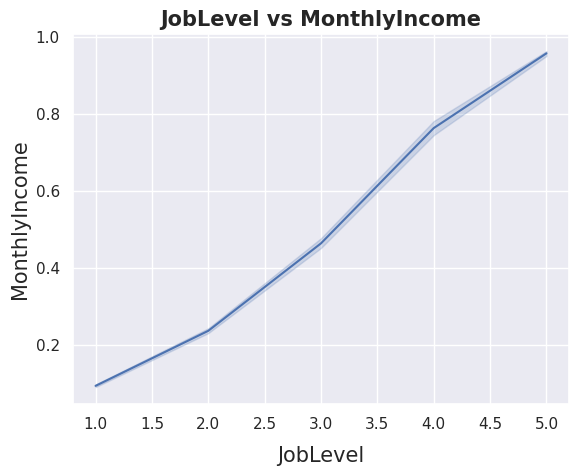

In [ ]:
sns.set(style="darkgrid")
sns.lineplot(data = df, x = 'JobLevel', y= 'MonthlyIncome')

plt.xlabel("JobLevel", fontsize=15, labelpad=10)
plt.ylabel("MonthlyIncome", fontsize=15)
plt.title("JobLevel vs MonthlyIncome", fontweight="bold", fontsize=15)

plt.show()

> The line chart shows a nearly straight positive slope, indicating a strong correlation between `JobLevel` and `MonthlyIncome` . This means that on average, employees with higher job levels earn higher income each month.

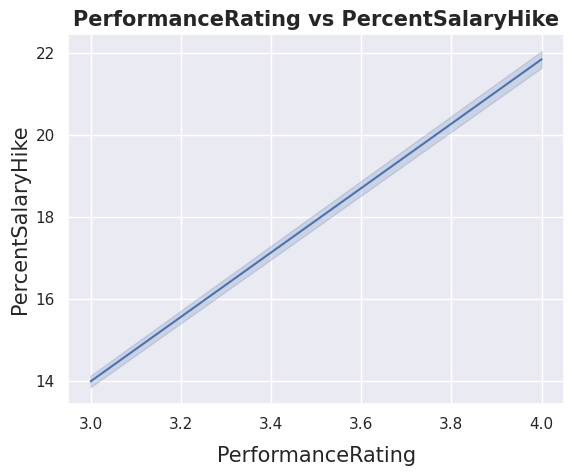

In [ ]:
sns.set(style="darkgrid")
sns.lineplot(data = df, x = 'PerformanceRating', y= 'PercentSalaryHike')

plt.xlabel("PerformanceRating", fontsize=15, labelpad=10)
plt.ylabel("PercentSalaryHike", fontsize=15)
plt.title("PerformanceRating vs PercentSalaryHike", fontweight="bold", fontsize=15)

plt.show()

> The line chart shows a straight positive slope, indicating a strong correlation between `PerformanceRating` and `PercentSalaryHike` . Indicating that employees with higher performance ratings tend to receive higher salary hikes.

### Target Variable Analysis

> Since `Attrition` is the target variable, it will be inspected by visualizing the disturbution of the labels.

In [ ]:
# Define a function to create a pie chart
def plot_pie_chart(labels, sizes):
    # Plotting the pie chart
    sns.set(style="darkgrid")
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                                      textprops=dict(color="w"))

    # Adding labels in each wedge
    for text, autotext in zip(texts, autotexts):
        text.set_text(f'{autotext.get_text()}')

    ax.set_title("Employees Attrition (%)", fontweight="bold", fontsize=15)

    # Adding legend
    ax.legend(wedges, labels, title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Display the plot
    plt.show()

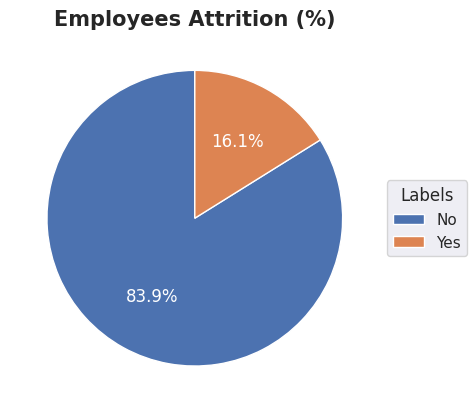

In [ ]:
# Count the number of employees who stayed and left
#Attrition_df = df['Attrition'].value_counts()

# Create a dictionary to decode the 'Attrition' feature
#decoded_dict = {1: 'No', 0: 'Yes'}

# Map the values to its original label
#decoded_labels = [decoded_dict[item] for item in list(Attrition_df.index)]

#labels = decoded_labels
#sizes = list(Attrition_df.values)

labels = df['Attrition'].value_counts().index
sizes = list(df['Attrition'].value_counts().values)

# Plotting the pie chart
plot_pie_chart(labels, sizes)

> It appears that the employee attrition rate is 16%, which is generally considered a healthy rate and may reflects the overall health of the company. However, it's important to note that a healthy attrition rate can vary depending on factors such as industry, company size, or employee demographics.

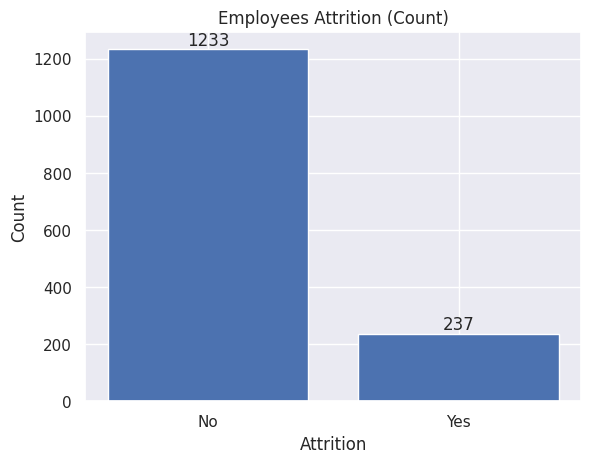

In [ ]:
# Create a bar chart
plt.bar(labels, sizes)

# Add labels and a title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title("Employees Attrition (Count)")

# Add labels on the bars
for i, count in enumerate(sizes):
  plt.text(i, count, str(count), ha='center', va='bottom')


# Show the chart
plt.show()

> Based on the above graphs, it seems that the dataset is imbalanced. This imbalance will be addressed in the training section.

---

> In the following section, the features will be explored with the target variable to discover any potential trends.

#### Attrition vs Gender

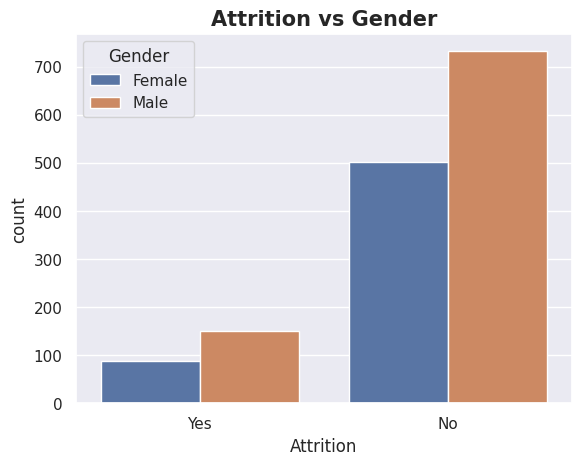

In [ ]:
sns.countplot(x = 'Attrition', hue = 'Gender', data = df)

plt.title("Attrition vs Gender", fontweight="bold", fontsize=15)
plt.show()

> As seen in the graph above, the attrition rate patterns for genders is similar to the overall distribution, indicating that gender does not have a significant impact on employee attrition.

#### Attrition vs Age

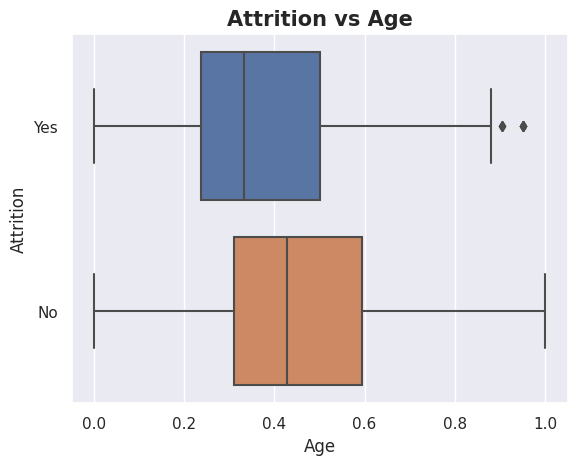

In [ ]:
sns.boxplot(x = 'Age', y = 'Attrition', data = df)

plt.title("Attrition vs Age", fontweight="bold", fontsize=15)
plt.show()

> Acoording to the graph above, employee attrition is most common among individuals between the late 20s to the late 40s. This is a common trend in many industries, as employees in this age group may be seeking new challenges, have family responsibilities, or have higher salary expectations, making it harder for companies to retain them.

#### Attrition vs Distance From Home

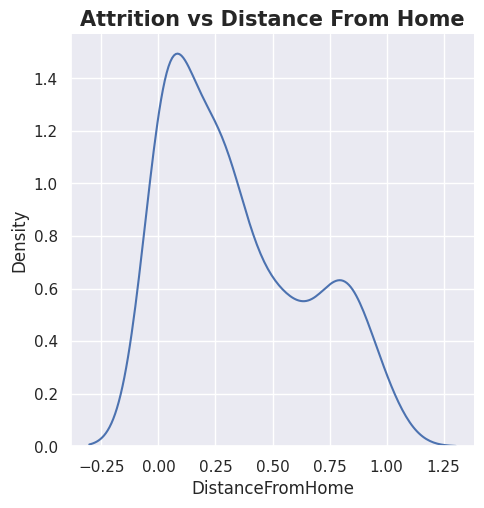

In [ ]:
sns.displot(x = 'DistanceFromHome',
            data = df[df['Attrition'] == 'Yes'],
            kind="kde")

plt.title("Attrition vs Distance From Home", fontweight="bold", fontsize=15)
plt.show()

> Unexpectedly, the employee attrition is the highest for those who live closer to their workplace.

#### Attrition vs Education

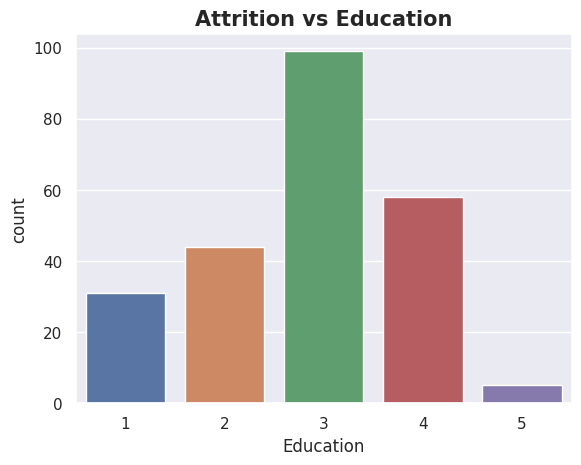

In [ ]:
sns.countplot(x = 'Education',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Education", fontweight="bold", fontsize=15)
plt.show()

> As seen in the graph above, the attrition rate patterns for education is similar to the overall distribution, indicating that education does not have a significant impact on employee attrition.

#### Attrition vs Environment Satisfaction

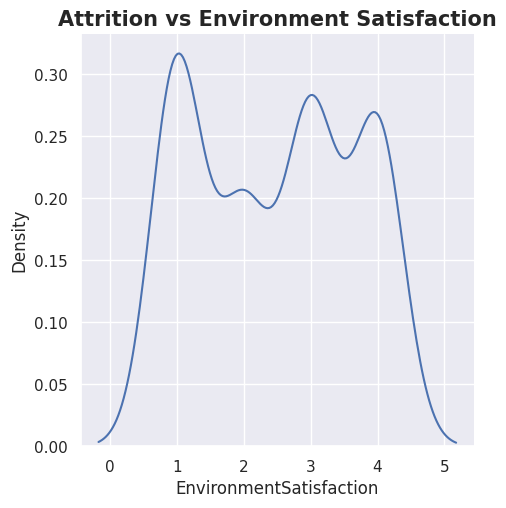

In [ ]:
sns.displot(x = 'EnvironmentSatisfaction',
            data = df[df['Attrition'] == 'Yes'],
            kind="kde")

plt.title("Attrition vs Environment Satisfaction", fontweight="bold", fontsize=15)
plt.show()

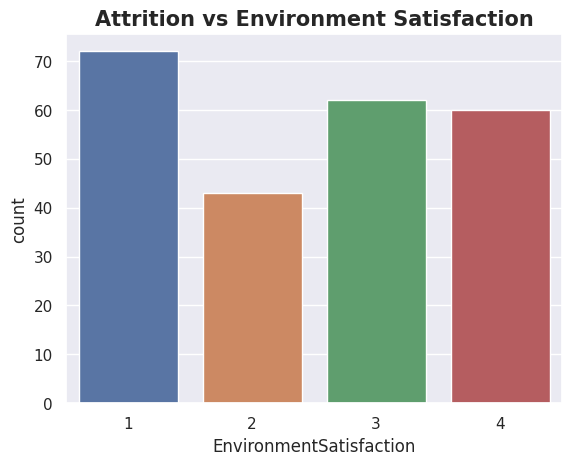

In [ ]:
sns.countplot(x = 'EnvironmentSatisfaction',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Environment Satisfaction", fontweight="bold", fontsize=15)
plt.show()

> As expected, employees who are less satisfied with the work environment are more prone to attrition.

#### Attrition vs Job Level

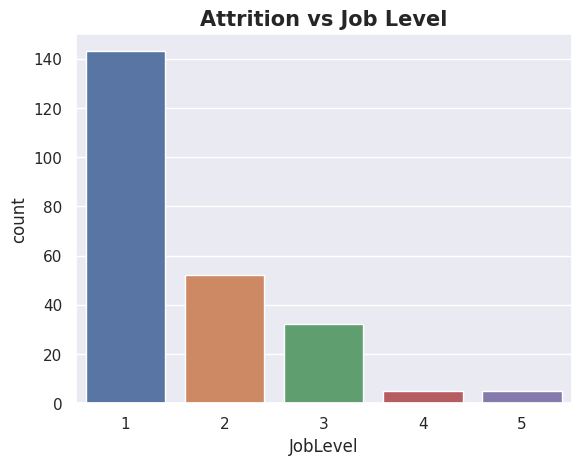

In [ ]:
sns.countplot(x = 'JobLevel',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Job Level", fontweight="bold", fontsize=15)
plt.show()

#### Attrition vs Job Satisfaction

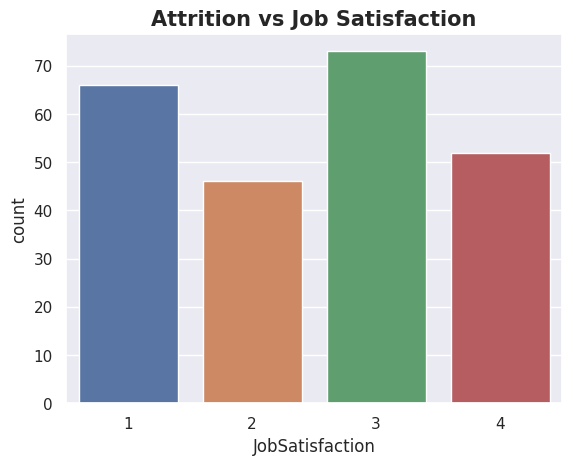

In [ ]:
sns.countplot(x = 'JobSatisfaction',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Job Satisfaction", fontweight="bold", fontsize=15)
plt.show()

#### Attrition vs Monthly Income

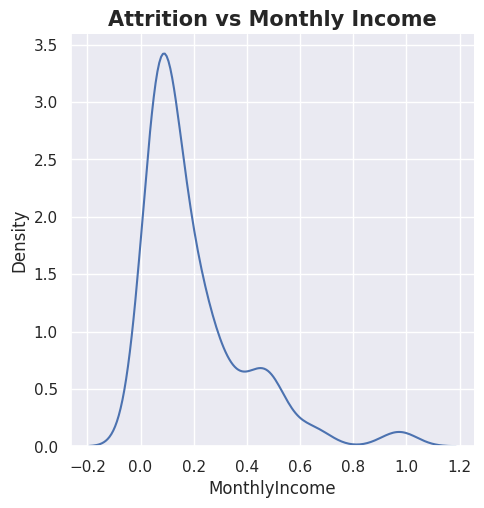

In [ ]:
sns.displot(x = 'MonthlyIncome',
              data = df[df['Attrition'] == 'Yes'],
            kind="kde")

plt.title("Attrition vs Monthly Income", fontweight="bold", fontsize=15)
plt.show()

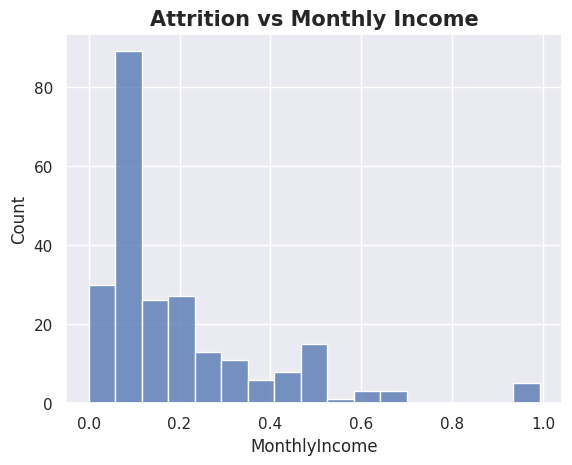

In [ ]:
sns.histplot(x = 'MonthlyIncome',
             data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Monthly Income", fontweight="bold", fontsize=15)
plt.show()

> As expected, employees with a low monthly income of 2,500 are more prone to leave the company.

#### Attrition vs Over Time

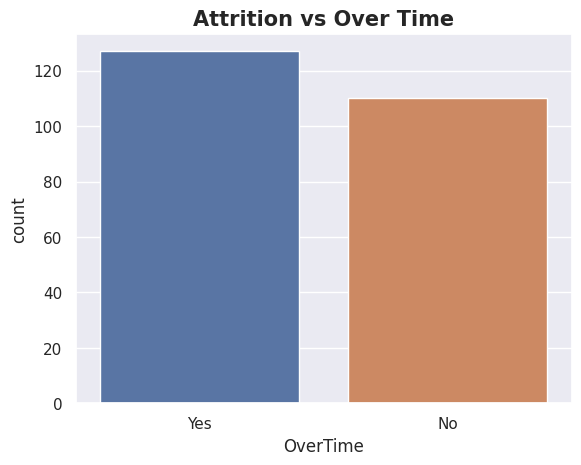

In [ ]:
sns.countplot(x = 'OverTime',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Over Time", fontweight="bold", fontsize=15)
plt.show()

#### Attrition vs Relationship Satisfaction

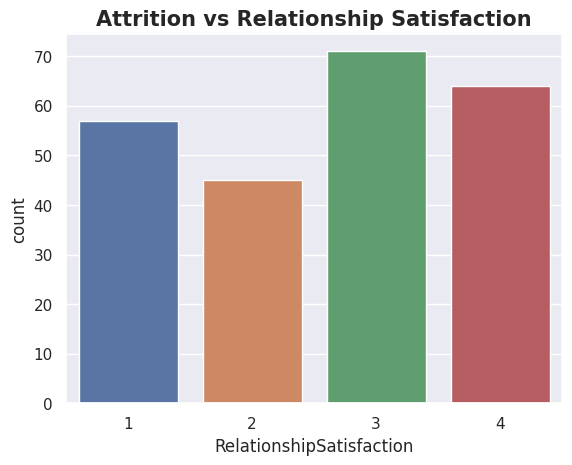

In [ ]:
sns.countplot(x = 'RelationshipSatisfaction',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Relationship Satisfaction", fontweight="bold", fontsize=15)
plt.show()

> Unexpectedly, employees with relatively satisfying relationships are more prone to attrition.

#### Attrition vs Total Working Years

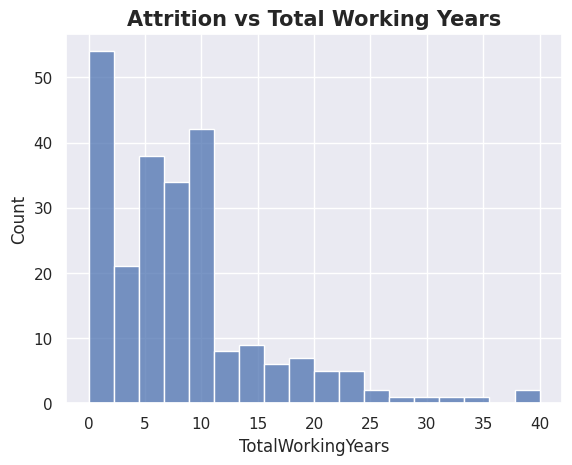

In [ ]:
sns.histplot(x = 'TotalWorkingYears',
             data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Total Working Years", fontweight="bold", fontsize=15)
plt.show()

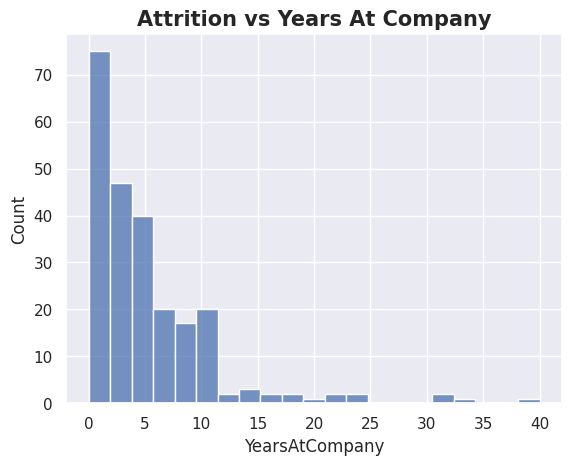

In [ ]:
sns.histplot(x = 'YearsAtCompany',
             data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Years At Company", fontweight="bold", fontsize=15)
plt.show()

> Acoording to the above graph, employee attrition is highest among those with no work experience.

#### Attrition vs Work-Life Balance

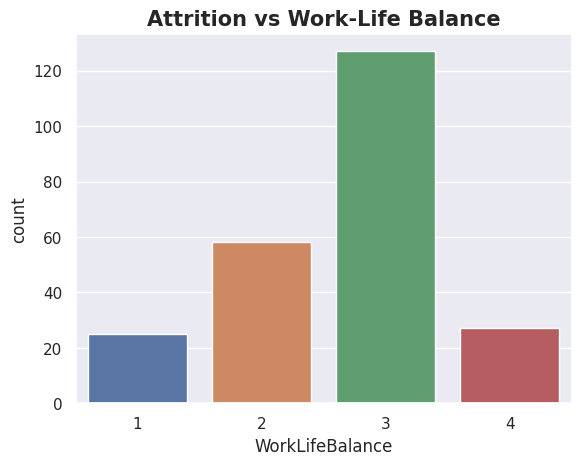

In [ ]:
sns.countplot(x = 'WorkLifeBalance',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Work-Life Balance", fontweight="bold", fontsize=15)
plt.show()

> Unexpectedly, employees with relatively good work-life balance are more prone to attrition.

#### Attrition vs Marital Status

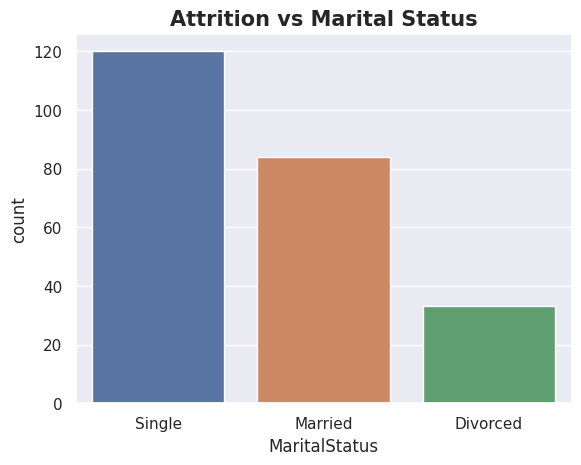

In [ ]:
sns.countplot(x = 'MaritalStatus',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Marital Status", fontweight="bold", fontsize=15)
plt.show()

> According to the above graph, single employees are more prone to attrition. This pattern is likely driven by a combination of personal, professional, and financial factors.

#### Attrition vs Department

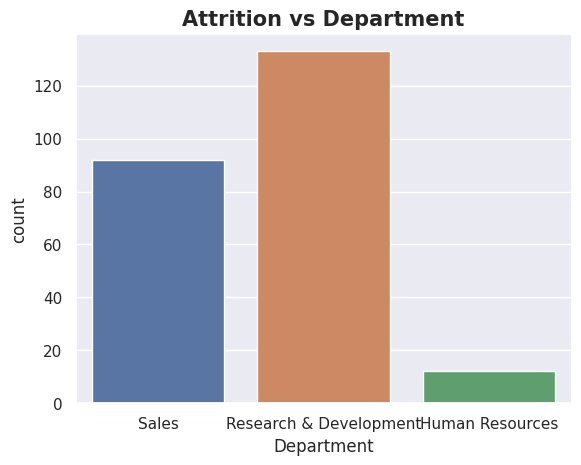

In [ ]:
sns.countplot(x = 'Department',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Department", fontweight="bold", fontsize=15)
plt.show()

> According to the above graph, the attrition rate patterns for department is similar to the overall distribution, indicating that department does not have a significant impact on employee attrition.

#### Attrition vs Job Role

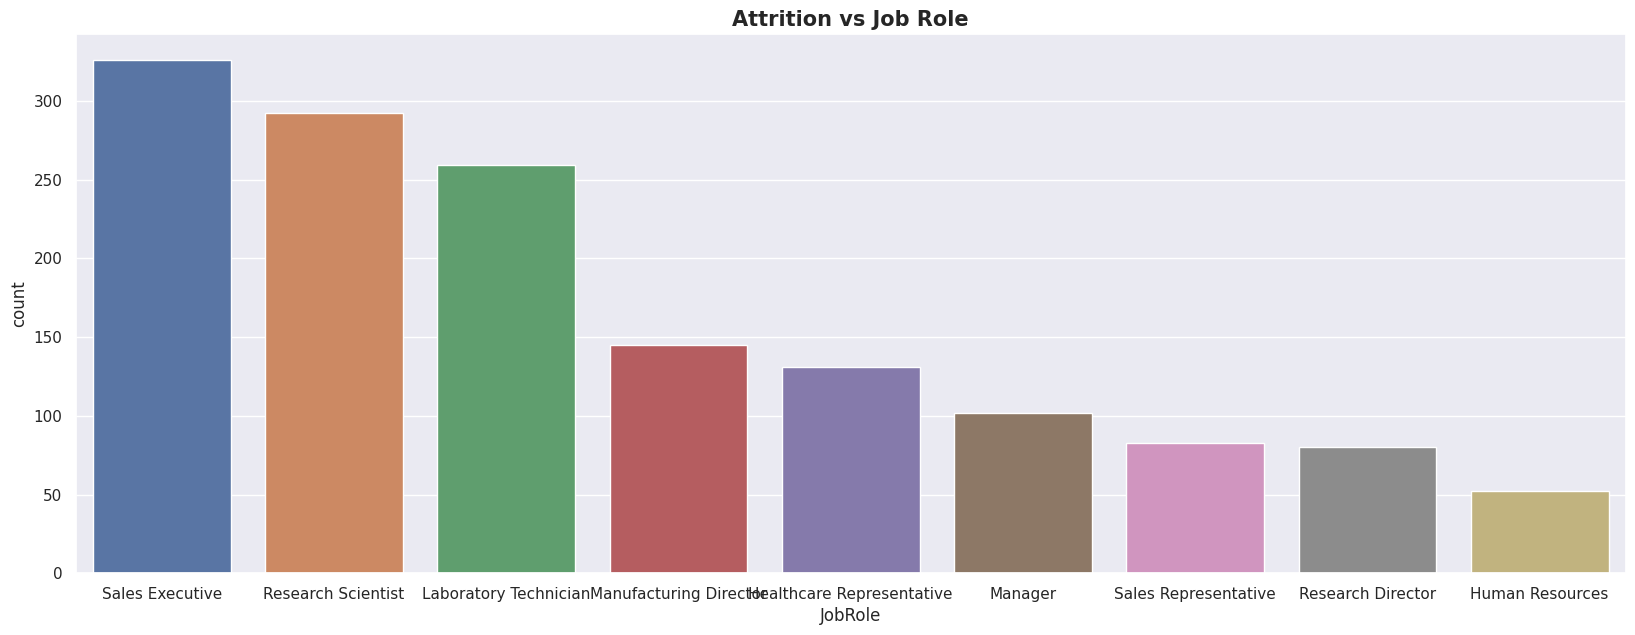

In [ ]:
f, ax = plt.subplots(figsize=(20, 7))
sns.countplot(x = 'JobRole',
              data = df)

plt.title("Attrition vs Job Role", fontweight="bold", fontsize=15)
plt.show()

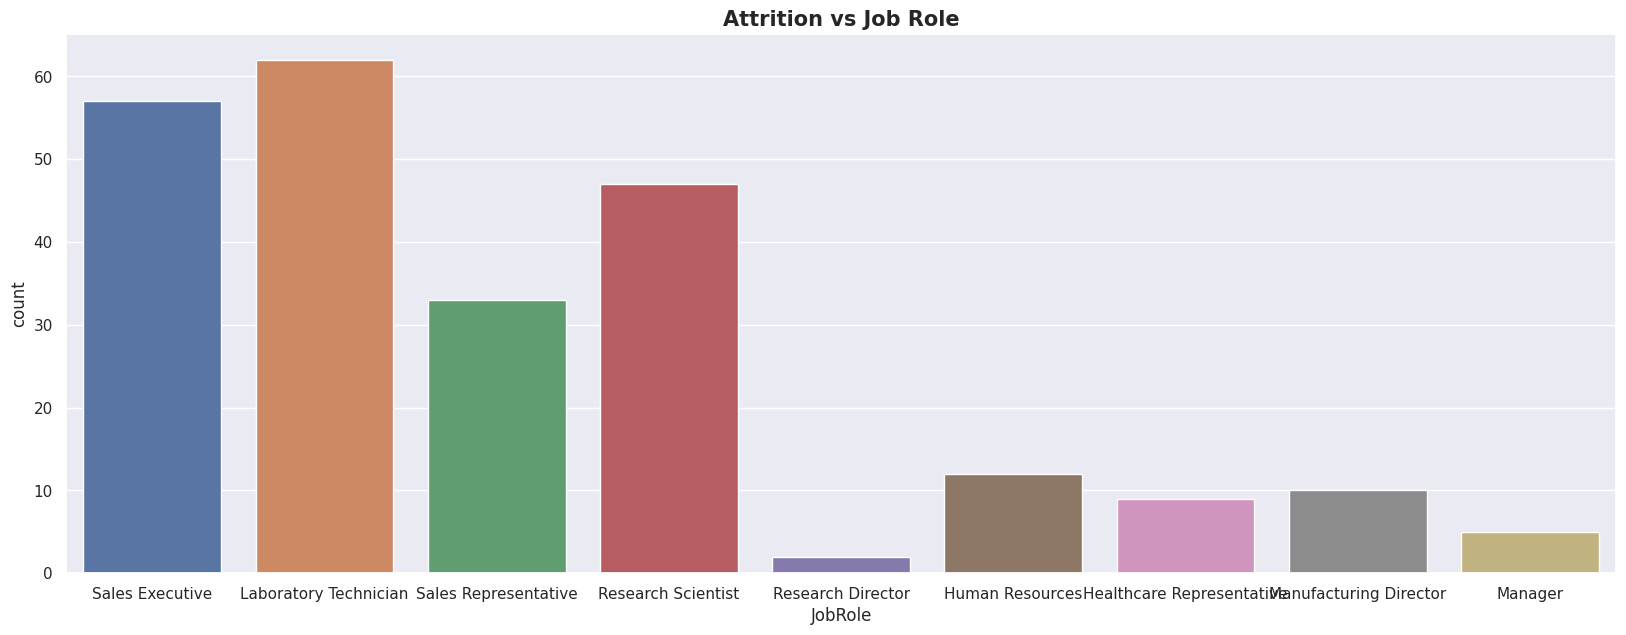

In [ ]:
f, ax = plt.subplots(figsize=(20, 7))
sns.countplot(x = 'JobRole',
              data = df[df['Attrition'] == 'Yes'])

plt.title("Attrition vs Job Role", fontweight="bold", fontsize=15)
plt.show()

> It appears that **Laboratory Technicians** and **Research Scientists** have the lowest monthly rate, which may have a correlation with their attrition rate.

> Based on the above findings, the following factors were found to have the most impact on employee attrition:
- Late 20's - late 40's
- live closer to work
- low income
- newly hired, no prior experience
- Single
- Research & Development dept
- Laboratory Technician, Sales Executive or Research Scientist

1. Late 20's - late 40's
2. live closer to work
3. low income
4. newly hired, no prior experience
5. Single
6. Research & Development dept
7. Laboratory Technician, Sales Executive or Research Scientist

### In-Depth Analysis of Job Roles

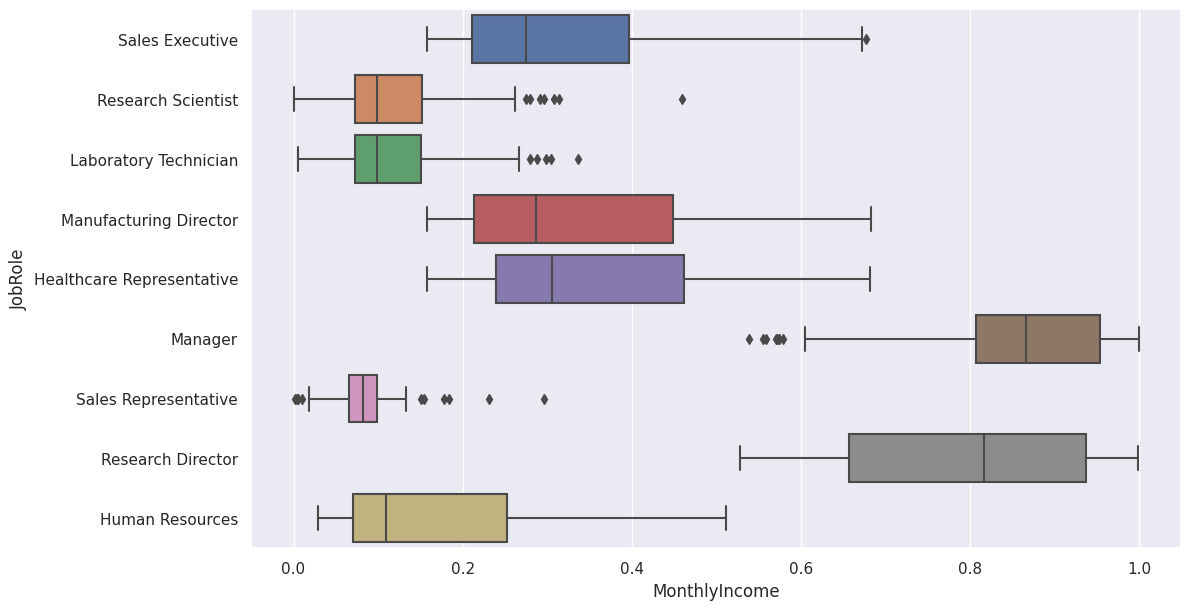

In [ ]:
# Let's see the Job Role vs. Monthly Income
plt.figure(figsize = (12, 7))
sns.boxplot(data= df, x = 'MonthlyIncome', y = 'JobRole');

> According to the above graph, the top three job roles that are more prone to attritition are Laboratory Technicians, followed by Sales Executives, then Research Scientists.

In [ ]:
# A dataframe for attritated Sales Executives
df_SE = df[(df['JobRole']=='Sales Executive') & (df['Attrition']=='Yes')]

# A dataframe for attritated Laboratory Technicians
df_LT = df[(df['JobRole']=='Laboratory Technician') & (df['Attrition']=='Yes')]

# A dataframe for attritated Research Scientists
df_RS = df[(df['JobRole']=='Research Scientist') & (df['Attrition']=='Yes')]

# combine all the dataframes in a list
dict_jobs_roles = {
    'Sales Executive': df_SE,
    'Laboratory Technician': df_LT,
    'Research Scientist': df_RS
}

In [ ]:
df_SE.head()

Age Attrition BusinessTravel  DailyRate Department  \
0    0.547619       Yes  Travel_Rarely   0.715820      Sales   
89   0.666667       Yes  Travel_Rarely   0.405870      Sales   
107  0.166667       Yes  Travel_Rarely   0.098783      Sales   
124  0.309524       Yes  Travel_Rarely   0.105225      Sales   
132  0.309524       Yes  Travel_Rarely   0.314961      Sales   

     DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0            0.000000          2  Life Sciences                        2   
89           0.285714          2        Medical                        3   
107          0.142857          3      Marketing                        3   
124          0.178571          4  Life Sciences                        2   
132          0.678571          3  Life Sciences                        2   

     Gender  ...  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0    Female  ...                1               6                   4   
89     Male  ...                3               9                   8   
107    Male  ...                3               6                   4   
124    Male  ...                2               7                   7   
132  Female  ...                3               2                   2   

    YearsSinceLastPromotion  YearsWithCurrManager H2D_Ratio  D2M_Ratio  \
0                         0                     5      8.02      62.34   
89                        4                     7      6.12      32.92   
107                       0                     3      8.82       2.14   
124                       7                     7     23.20       2.99   
132                       2                     2      9.30      11.85   

     H2M_Ratio  OverallSatisfaction AgeGroup  
0         0.45                    8        3  
89        0.30                   14        4  
107       0.08                   13        2  
124       0.28                    9        2  
132       0.20                   11        2  

[5 rows x 36 columns]

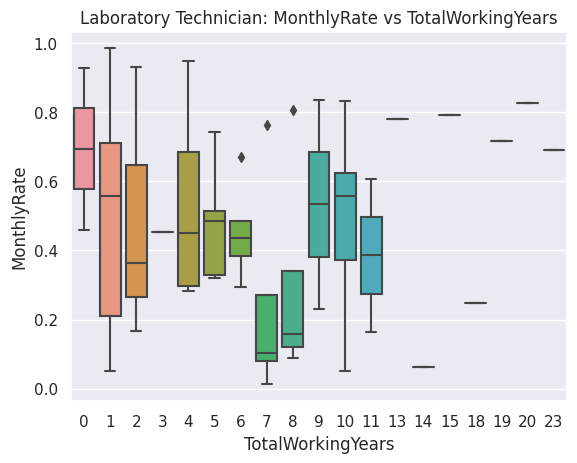

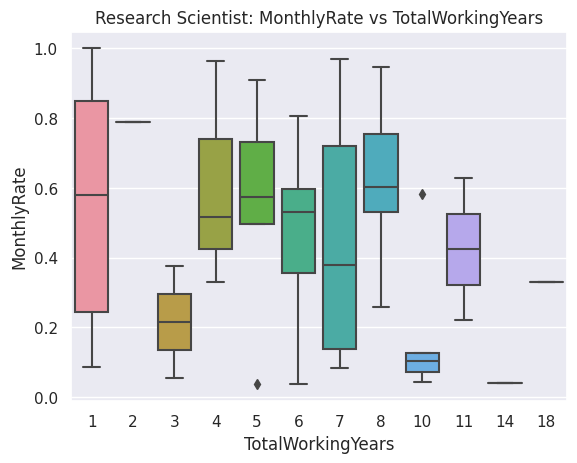

In [ ]:
# Let's explore the TotalWorkingYears impact on the MonthlyRate
for key, value in dict_jobs_roles.items():
  sns.boxplot(data = value, x = "TotalWorkingYears", y = 'MonthlyRate')
  plt.title(key + ": MonthlyRate vs TotalWorkingYears")
  plt.show()

> In general, it is commonly recognized that employees with more experience tend to earn higher income. However, the above graphs reveal a noticeable inconsistency between an employee's years of experience and their corresponding monthly rate. This may explain the reason for their high attrition rate.

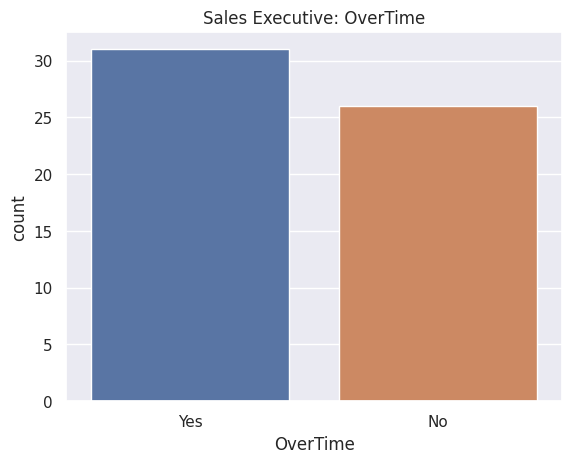

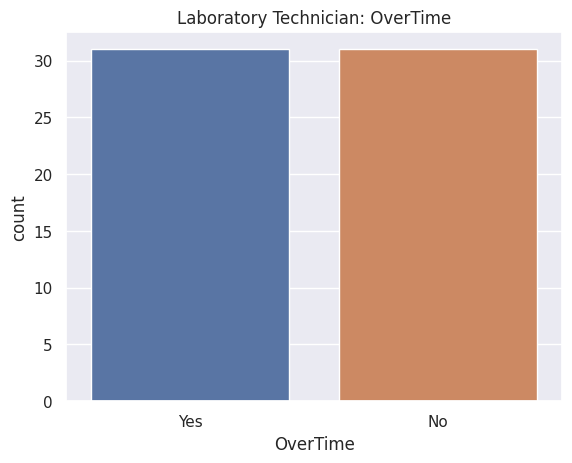

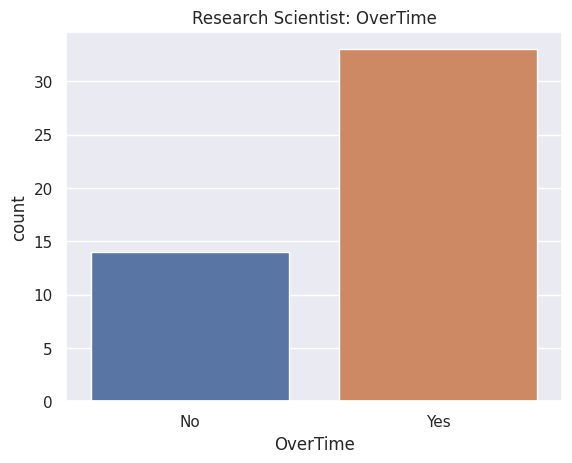

In [ ]:
# Let's explore the OverTime impact on Attrition
for key, value in dict_jobs_roles.items():
  sns.countplot(x = 'OverTime', data = value)
  plt.title(key + ": OverTime")
  plt.show()

> According to the above graphs, it appears that overtime may contribute to the attrition of Research Scientists.

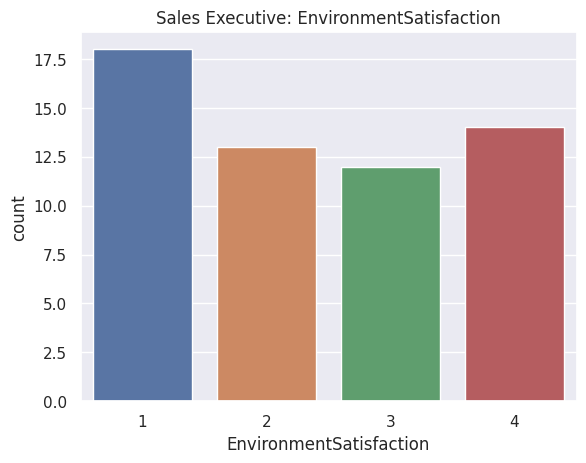

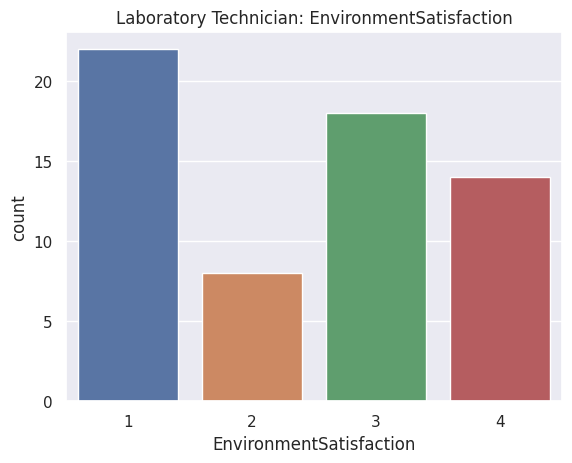

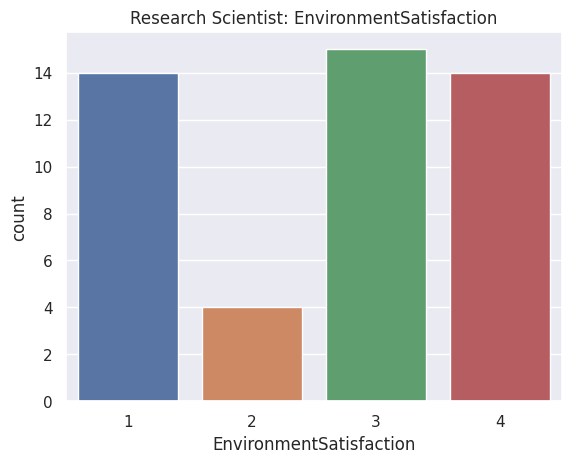

In [ ]:
# Let's explore
for key, value in dict_jobs_roles.items():
  sns.countplot(x = 'EnvironmentSatisfaction', data = value)
  plt.title(key + ": EnvironmentSatisfaction")
  plt.show()

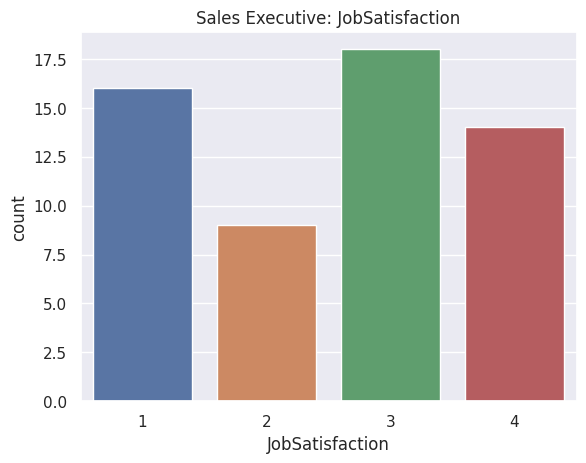

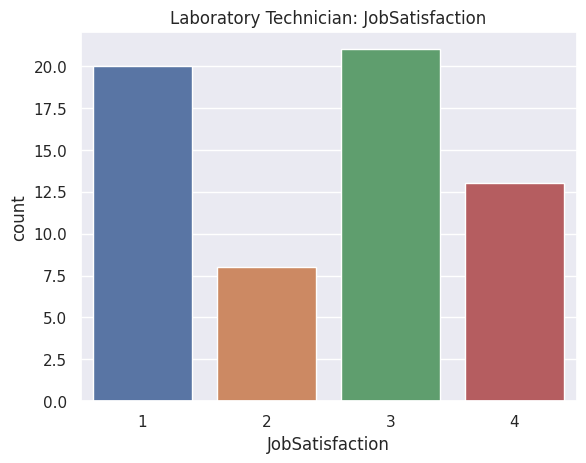

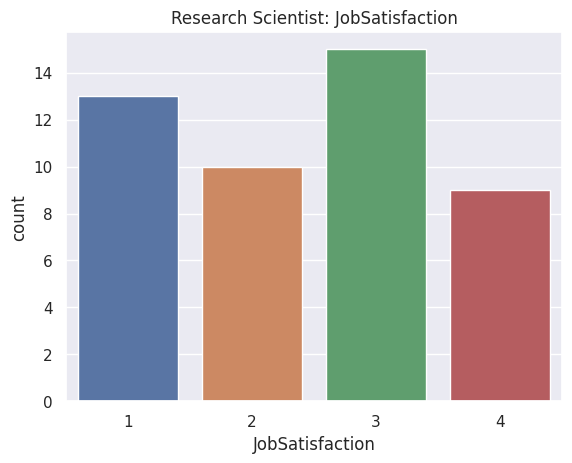

In [ ]:
# Let's explore
for key, value in dict_jobs_roles.items():
  sns.countplot(x = 'JobSatisfaction', data = value)
  plt.title(key + ": JobSatisfaction")
  plt.show()

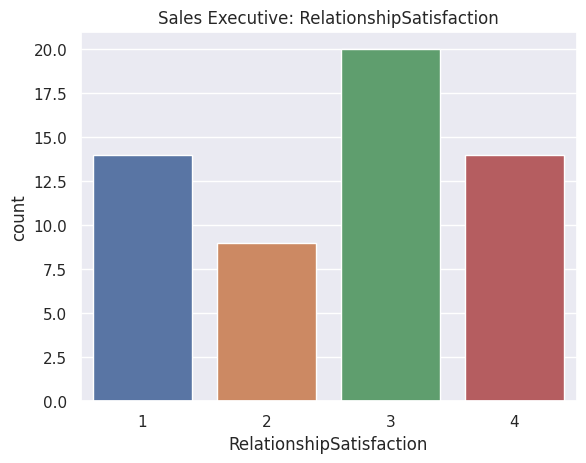

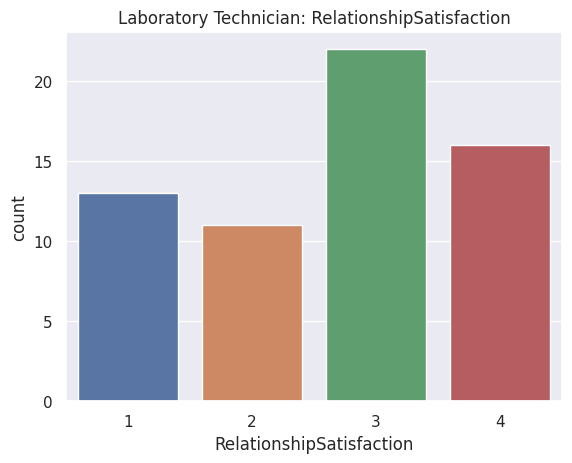

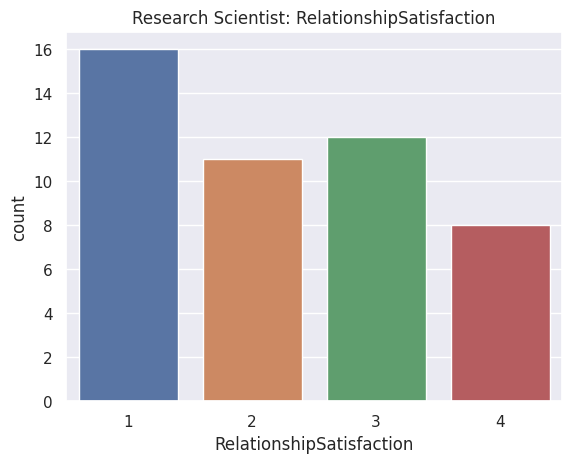

In [ ]:
# Let's explore
for key, value in dict_jobs_roles.items():
  sns.countplot(x = 'RelationshipSatisfaction', data = value)
  plt.title(key + ": RelationshipSatisfaction")
  plt.show()

> According to the above graphs, there is no noticable trend between employee satisfaction indicators and attrition rates.


In [ ]:
grouped = df_SE.groupby('YearsAtCompany')
result  = grouped.agg({'MonthlyRate': ['min', 'mean', 'max'],
                       'TotalWorkingYears': 'min'})
result

MonthlyRate                     TotalWorkingYears
                       min      mean       max               min
YearsAtCompany                                                  
0                 0.321140  0.444462  0.608593                 5
1                 0.141980  0.512999  0.678900                 5
2                 0.150532  0.706540  0.967356                 4
3                 0.378157  0.646764  0.980245                 6
4                 0.038948  0.584116  0.876129                 5
5                 0.102710  0.462767  0.654126                 6
6                 0.161253  0.636820  0.998394                 6
7                 0.557800  0.653222  0.748645                12
8                 0.255210  0.428958  0.780566                 8
9                 0.151215  0.464338  0.779964                 9
10                0.129653  0.562528  0.900663                10
11                0.334069  0.349087  0.364104                11
13                0.780406  0.780406  0.780406                15
14                0.515077  0.733708  0.952339                14
15                0.229713  0.229713  0.229713                16
16                0.137482  0.137482  0.137482                16
19                0.288416  0.288416  0.288416                24
21                0.014174  0.014174  0.014174                22
23                0.886167  0.886167  0.886167                25

---

## **Training & Testing the Model**

### Splitting Data into Training and Testing Sets

In [ ]:
# Pop the target variable 'Atrittion' and assign it to y
y = df_encoded.pop('Attrition')
X = df_encoded

In [ ]:
# Split the DataFrame for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Handle Imbalance Classes

Imbalanced datasets can lead to several issues, including biased models, misleading evaluation metrics, and an increased risk of overfitting. After testing various techniques, it was found that handling imbalance with **RandomUnderSampler** can significantly improve the model's performance .

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test.shape)
print(y_test.shape)

(378, 54)
(378,)
(368, 54)
(368,)


### Feature Importance

Performing feature importance analysis is crucial for understanding which features have the most impact on the target variable.  

Based on conducted tests, it was found that discarding less important features before training the models can significantly improve their performance. Therefore, a baseline Random Forest model will be trained to obtain feature importance scores.

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Store only features with importance score above 0.009
important_features = []
for i, j in feature_importance_df.iterrows():
  if j['Importance'] > 0.009:
    important_features.append(j['Feature'])

In [ ]:
len(important_features)

32

In [ ]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test.shape)
print(y_test.shape)

(378, 54)
(378,)
(368, 54)
(368,)


In [ ]:
X_train_resampled = X_train_resampled[important_features]
X_train_resampled.shape

(378, 32)

In [ ]:
X_test = X_test[important_features]
X_test.shape

(368, 32)

In [ ]:
y_test.shape

(368,)

In [ ]:
y_train_resampled.shape

(378,)

### Model Training

> In this section, a pipeline will be created to test multiple baseline models, apply cross-validation, then selecting best performing models. The results include both ROC-AUC and Accuracy scores, including their respective mean and standard deviation.

In [ ]:
# Define models and their respective hyperparameter grids for tuning
models = [

    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'param_grid': {
              'penalty': ['l1', 'l2'],
              'C': np.logspace(-4, 4, 9),
              'solver': ['liblinear', 'saga']
          }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'Gaussian Naive Bayes',
        'model': GaussianNB(),
        'param_grid': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    },
    {
        'name': 'K-Nearest Neighbors (KNN)',
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    {
        'name': 'Support Vector Machine (SVM)',
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear'],
            'gamma': ['scale', 'auto', 0.1, 1, 10]
        }
    }
]

In [ ]:
# Create a list to store the accuracy and AUC-ROC scores for each model
acc_results = []
auc_results = []
names = []

# Create a dataframe to disply the performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)


# Loop control variable
i = 0

for model_info in models:
  model_name = model_info['name']
  model = model_info['model']

  # evaluate each model using cross-validation
  kfold = KFold(n_splits=10, shuffle=True)  # 10-fold cross-validation
  # accuracy scoring
  cv_acc_results = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')
  # roc_auc scoring
  cv_auc_results = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring='roc_auc')

  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(model_name)
  df_results.loc[i] = [model_name,
                       round(cv_auc_results.mean()*100, 2),
                       round(cv_auc_results.std()*100, 2),
                       round(cv_acc_results.mean()*100, 2),
                       round(cv_acc_results.std()*100, 2)
                       ]
  i += 1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
0           Logistic Regression         77.34         7.53          70.66   
4                 Random Forest         74.50         7.93          67.50   
2          Gaussian Naive Bayes         74.22         7.41          67.97   
1                 Decision Tree         59.90         8.36          61.92   
3     K-Nearest Neighbors (KNN)         54.01        10.75          53.95   
5  Support Vector Machine (SVM)         53.67         6.66          55.24   

   Accuracy STD  
0          5.83  
4         10.25  
2          7.77  
1          7.19  
3          7.02  
5          9.78

Given the imbalance in the dataset, focusing solely on **Accuracy** could be misleading. A model could simply predict the majority class to achieve high accuracy, but miss important insights into identifying the minority class. Therefore, we opted for AUC-ROC as a more robust performance metric.

Based on the above comparison, **Logistic Regression, Random Forest, Gaussian Naive Bayes, and Decision Tree** have the best AUC-ROC scores. Therefore, their performance will be further improved by tuning their hyperparameters.

In [ ]:
# Get the top 4 best models name by sorting the dataframe based on the ROC-AUC scores
best_models_names = list(df_results.sort_values(by=['ROC AUC Mean'], ascending=False)['Algorithm'][:4])
# Select only best models from models list
best_models = [model for model in models if model['name'] in best_models_names]

In [ ]:
best_models_names

['Logistic Regression',
 'Random Forest',
 'Gaussian Naive Bayes',
 'Decision Tree']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Support Vector Machine (SVM) - ROC AUC: 0.7779


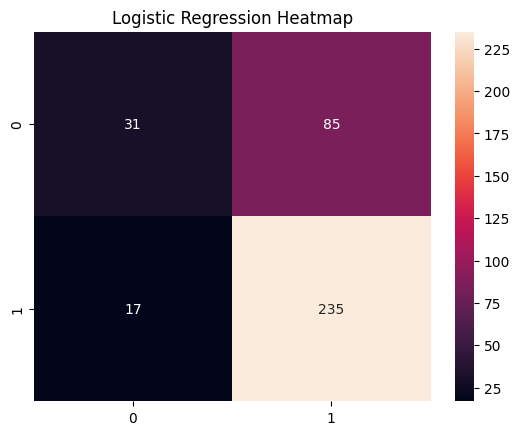

              precision    recall  f1-score   support

           0       0.27      0.65      0.38        48
           1       0.93      0.73      0.82       320

    accuracy                           0.72       368
   macro avg       0.60      0.69      0.60       368
weighted avg       0.85      0.72      0.76       368

Support Vector Machine (SVM) - ROC AUC: 0.6343


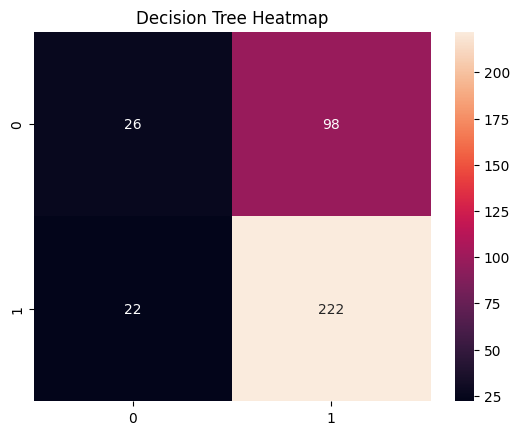

              precision    recall  f1-score   support

           0       0.21      0.54      0.30        48
           1       0.91      0.69      0.79       320

    accuracy                           0.67       368
   macro avg       0.56      0.62      0.54       368
weighted avg       0.82      0.67      0.72       368

Support Vector Machine (SVM) - ROC AUC: 0.7182


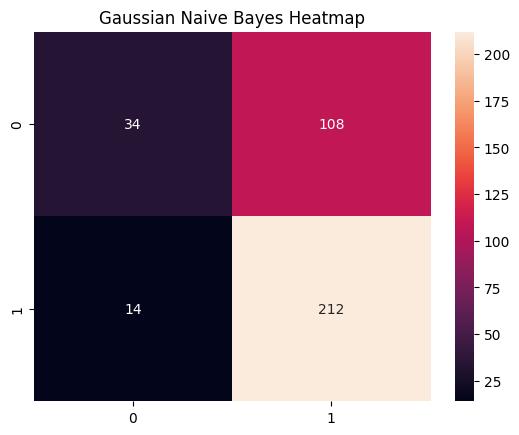

              precision    recall  f1-score   support

           0       0.24      0.71      0.36        48
           1       0.94      0.66      0.78       320

    accuracy                           0.67       368
   macro avg       0.59      0.69      0.57       368
weighted avg       0.85      0.67      0.72       368

Support Vector Machine (SVM) - ROC AUC: 0.7574


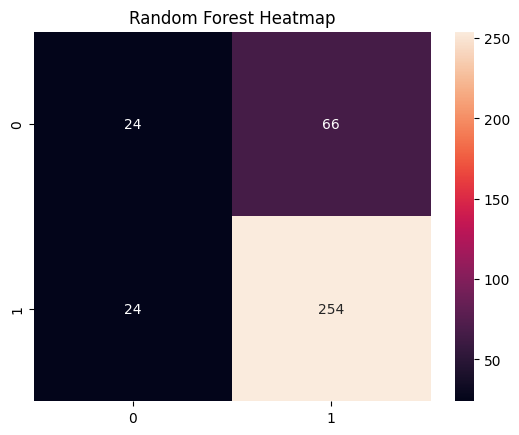

              precision    recall  f1-score   support

           0       0.27      0.50      0.35        48
           1       0.91      0.79      0.85       320

    accuracy                           0.76       368
   macro avg       0.59      0.65      0.60       368
weighted avg       0.83      0.76      0.78       368



In [ ]:
# Test multiple models with cross-validation
for model_info in best_models:
    name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']

    # Hyperparameter tuning using Grid Search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best model with tuned hyperparameters
    best_model = grid_search.best_estimator_

    # Evaluate the model on the test set
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Print ROC AUC score for each model
    print(f"{name} - ROC AUC: {roc_auc * 100:.2f}%")

    # Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # print the confusion matrix
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot = True, fmt='d')
    plt.title(name + ' Heatmap')
    plt.show()

    # print the classification report
    print(classification_report(y_test, y_pred))

# Thank you for your interest in this notebook! I hope you find it helpful😄



### Train & Evaluate a Deep Learning Model

> Given that  a binary classification problem is being dealt with, a simple neural network with 2 layers will be constructed. The **Rectified Linear Unit (ReLU)** activation function will be used in the hidden layer, and **Sigmoid** activation function will be used in the last layer, and **Adam** as the optimizer .

In [ ]:
NN_model = tf.keras.models.Sequential()
NN_model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape = (32, )))
NN_model.add(tf.keras.layers.Dense(units=500, activation='relu'))
NN_model.add(tf.keras.layers.Dense(units=500, activation='relu'))
NN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               16500     
                                                                 
 dense_9 (Dense)             (None, 500)               250500    
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 1)                 501       
                                                                 
Total params: 518001 (1.98 MB)
Trainable params: 518001 (1.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
NN_model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = NN_model.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 0.8554 - accuracy: 0.8022
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 0.5122 - accuracy: 0.8149
Epoch 3/100
35/35 [==============================] - 0s 10ms/step - loss: 0.4325 - accuracy: 0.8276
Epoch 4/100
35/35 [==============================] - 0s 10ms/step - loss: 0.4473 - accuracy: 0.8240
Epoch 5/100
35/35 [==============================] - 0s 9ms/step - loss: 0.4430 - accuracy: 0.8358
Epoch 6/100
35/35 [==============================] - 0s 10ms/step - loss: 0.4010 - accuracy: 0.8430
Epoch 7/100
35/35 [==============================] - 0s 10ms/step - loss: 0.4006 - accuracy: 0.8503
Epoch 8/100
35/35 [==============================] - 0s 9ms/step - loss: 0.3800 - accuracy: 0.8512
Epoch 9/100
35/35 [==============================] - 0s 9ms/step - loss: 0.3709 - accuracy: 0.8603
Epoch 10/100
35/35 [==============================] - 0s 9ms/step - loss: 0.3592 - accuracy: 0.8530
Epoch

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)

y_pred = NN_model.predict(X_test)
y_pred = y_pred>0.5

12/12 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

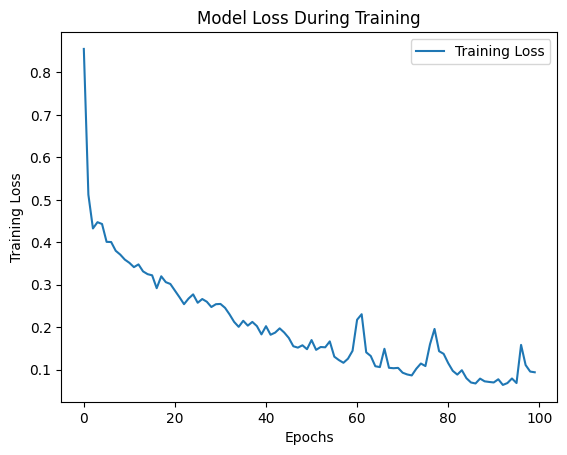

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss During Training")
plt.ylabel('Training Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss'])

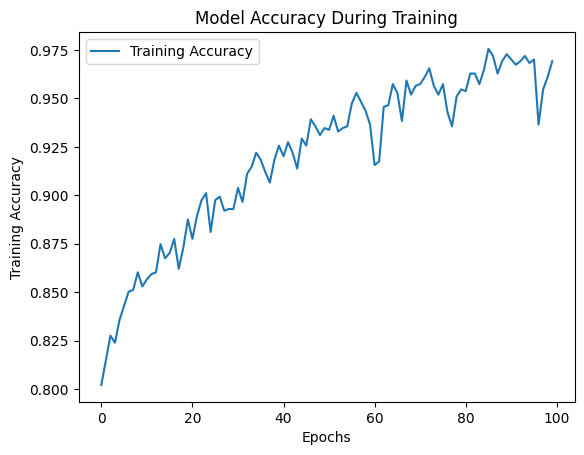

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model Accuracy During Training")
plt.ylabel('Training Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy'])

<Axes: >

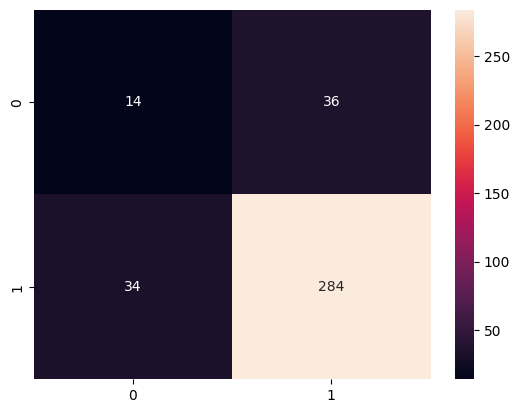

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.29      0.29        48
           1       0.89      0.89      0.89       320

    accuracy                           0.81       368
   macro avg       0.59      0.59      0.59       368
weighted avg       0.81      0.81      0.81       368

